In [1]:
import os
import pandas as pd

new_path = os.path.split(os.getcwd())[0]

import matplotlib.pyplot as plt

### bot_direct

In [2]:
bot_direct = pd.read_pickle(os.path.join(new_path,'_data','bot_direct.pkl'))

In [3]:
datetime_t2 = pd.to_datetime(bot_direct['t2_datetime'])
bot_direct['year'] = datetime_t2.dt.year

In [4]:
print(f"n total: {len(bot_direct)}")
print(f"complete: {len(bot_direct[(~bot_direct['t1_text_cleaned'].isnull())&(~bot_direct['t1_author_id'].isnull())])}") # complete
print(f"share complete in total: {len(bot_direct[(~bot_direct['t1_text_cleaned'].isnull())&(~bot_direct['t1_author_id'].isnull())])/len(bot_direct)}") # share complete in total
print(f"incomplete: {len(bot_direct) - len(bot_direct[(~bot_direct['t1_text_cleaned'].isnull())&(~bot_direct['t1_author_id'].isnull())])}") # incomplete
print(f"tweet_o not available: {len(bot_direct[bot_direct['t1_text_cleaned'].isnull()])}") # tweet_O not available
print(f"user_o not available: {len(bot_direct[bot_direct['t1_author_id'].isnull()])}") # user_O not available

n total: 309107
complete: 193623
share complete in total: 0.6263947435677614
incomplete: 115484
tweet_o not available: 115464
user_o not available: 96289


In [5]:
print(f"unique tweet_o: {len(bot_direct.drop_duplicates('t1_id'))}")
print(f"unique user_o: {len(bot_direct.drop_duplicates('t1_author_id'))}")
print(f"unique user_a: {len(bot_direct.drop_duplicates('t2_author_id'))}")

unique tweet_o: 189323
unique user_o: 171215
unique user_a: 185254


In [6]:
# bot_direct
print(f"most accusations: {bot_direct.sort_values('n_accusations', ascending=False)['n_accusations'].iloc[0]}")
print(f"most accusers: {bot_direct.sort_values('n_accusations', ascending=False)['n_accusers'].iloc[0]}")
print(f"most accusings: {bot_direct.sort_values('n_accusing', ascending=False)['n_accusing'].iloc[0]}")
print(f"most accusees: {bot_direct.sort_values('n_accusing', ascending=False)['n_accusees'].iloc[0]}")

# being accused
print(f"being accused by more than 1: {len(bot_direct[bot_direct['n_accusers']>1].drop_duplicates('t1_author_id'))}")
print(f"avg. number of accusers: {bot_direct[bot_direct['n_accusers']>1].drop_duplicates('t1_author_id')['n_accusers'].mean()}")

# accusing
print(f"accusing more than 1: {len(bot_direct[bot_direct['n_accusees']>1].drop_duplicates('t2_author_id'))}")
print(f"avg. number of accusees: {bot_direct[bot_direct['n_accusees']>1].drop_duplicates('t2_author_id')['n_accusees'].mean()}")

most accusations: 1321.0
most accusers: 983
most accusings: 1344
most accusees: 747.0
being accused by more than 1: 15748
avg. number of accusers: 3.2846075692151384
accusing more than 1: 24731
avg. number of accusees: 3.6719501839796207


### bot_general

In [7]:
bot_general = pd.read_pickle(os.path.join(new_path,'_data','bot_general.pkl'))

In [8]:
datetime_t2 = pd.to_datetime(bot_general['t2_datetime'])
bot_general['year'] = datetime_t2.dt.year

In [9]:
print(f"n total: {len(bot_general)}")
print(f"complete: {len(bot_general[(~bot_general['t1_text_cleaned'].isnull())&(~bot_general['t1_author_id'].isnull())])}") # complete
print(f"share complete in total: {len(bot_general[(~bot_general['t1_text_cleaned'].isnull())&(~bot_general['t1_author_id'].isnull())])/len(bot_general)}") # share complete in total
print(f"incomplete: {len(bot_general) - len(bot_general[(~bot_general['t1_text_cleaned'].isnull())&(~bot_general['t1_author_id'].isnull())])}") # incomplete
print(f"tweet_o not available: {len(bot_general[bot_general['t1_text_cleaned'].isnull()])}") # tweet_O not available
print(f"user_o not available: {len(bot_general[bot_general['t1_author_id'].isnull()])}") # user_O not available

n total: 9069182
complete: 5936705
share complete in total: 0.6546020357734579
incomplete: 3132477
tweet_o not available: 3131278
user_o not available: 2536108


In [10]:
# bot general
print(f"unique tweet_o: {len(bot_general.drop_duplicates('t1_id'))}")
print(f"unique user_o: {len(bot_general.drop_duplicates('t1_author_id'))}")
print(f"unique user_a: {len(bot_general.drop_duplicates('t2_author_id'))}")

unique tweet_o: 5387682
unique user_o: 2683510
unique user_a: 2391749


### bot_all

In [11]:
bot_all = pd.read_pickle(os.path.join(new_path,'_data','bot_all.pkl'))

In [12]:
len(bot_all)

22275139

In [13]:
datetime_t2 = pd.to_datetime(bot_all['t2_datetime'])
bot_all['year'] = datetime_t2.dt.year

### fig 2: yearly overview

In [14]:
pd_overview = pd.DataFrame([2007+i for i in range(16)], columns=['year'])

for name, df in [('bot_all',bot_all), ('bot_general',bot_general), ('bot_direct',bot_direct)]:
    stats = []
    for year in [2007+i for i in range(16)]:
        stats.append(len(df[df['year']==year]))
    pd_overview.loc[:,name] = stats

In [15]:
pd_overview.loc[:,'s_general_in_all'] = pd_overview['bot_general'] / pd_overview['bot_all']

share 'general accusations' in bot_all; average before 2017

In [16]:
pd_overview.iloc[:10].mean()['s_general_in_all']

0.1742846531955496

share 'general accusations' in bot_all; average since (and incl.) 2017

In [17]:
pd_overview.iloc[10:].mean()['s_general_in_all']

0.4634891745754213

In [18]:
pd_overview['sqrt_bot_all'] = pd_overview['bot_all']**0.5
pd_overview['sqrt_bot_direct'] = pd_overview['bot_direct']**0.5
pd_overview['sqrt_bot_general'] = pd_overview['bot_general']**0.5

In [19]:
ylabel = ['1e+05','5e+05','1e+06','5e+06']
yticks = [i**0.5 for i in [100000,500000,1000000,5000000]]
years = ["07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22"]

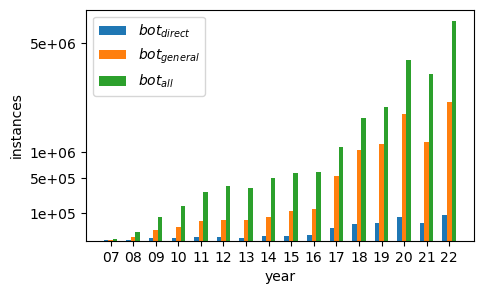

In [20]:
fig, ax = plt.subplots(figsize=(5,3))
width = 0.2
loc = 0.2

ax.set_xlabel('year')
ax.set_ylabel('instances')
plt.bar([i-loc for i in range(len(years))], pd_overview['sqrt_bot_direct'], label='$bot_{direct}$', width=width)
plt.bar([i for i in range(len(years))], pd_overview['sqrt_bot_general'], label='$bot_{general}$', width=width)
plt.bar([i+loc for i in range(len(years))], pd_overview['sqrt_bot_all'], label=r'$bot_{all}$', width=width)
plt.legend()
ax.set_xticks([i for i in range(len(years))],years)
ax.set_yticks(yticks,ylabel)

plt.plot()
plt.savefig(os.path.join(new_path,'_results','fig2_accusations.pdf'), bbox_inches='tight')
plt.show()